# AST1420 - Assignment 3

## Emaad Paracha - 1003687236

## 0. Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.misc import derivative
import numpy as np
from IPython.display import Image
import scipy.optimize as opt

import warnings
warnings.filterwarnings("ignore") #Not ideal, I just wanted to make the notebook cleaner

## Question 1 - Gravitational collapse in one dimension.
"[One] grows stale if he works all the time on insoluble problems, and a trip to the beautiful world of one dimension will refresh his imagination better than a dose of LSD." - Freeman Dyson

Gravitational N-body simulations of structure formation in the Universe are complex and computationally demanding. Fortunately, some of the physics of gravitational collapse can be understood by simulating one-dimensional systems, where it is easy to reach high resolution and where gravity is simpler. Let’s explore the formation of dark matter halos using gravitational N-body simulations in one dimension.

### Part a

The Poisson equation is as usual

$$\nabla^2 \Phi = 4\pi G \rho$$

An important aspect of understanding gravitation is the determination
of the Green's function, that is, the solution of this equation
for a density $\rho(x) \propto \delta(x)$. In three dimensions, we
showed in the notes that the gravitational potential for
$\rho(\vec{x}) = M\,\delta(\vec{x})$ is the familiar $\Phi = -GM/r$
with $r = |\vec{x}|$. Show that the solution for $\rho(x) =
A\,\delta(x)$ in one dimension is given by $\Phi(x) = 2\pi
G\,A\,|x|$. What are the units of $A$?

If we plug in the given $\Phi(x) = 2\pi G A|x|$ into the Poisson equation, we get:

$$\nabla^{2}(2\pi G A|x|) = 4\pi G \rho $$

Since we're only working in 1 dimension, our Laplacian is just $\nabla^{2} = \frac{\partial^{2}}{\partial x^{2}}$. Thus, using that, we get:

$$ 2\pi G A (\frac{\partial^{2} |x|}{\partial x^{2}}) = 4\pi G\rho$$

Or rearranging:

$$\rho = \frac{A}{2}(\frac{\partial^{2} |x|}{\partial x^{2}})$$

We know that $|x|$ is defined as:

$$
|x| =
  \begin{cases}
                                   x & \text{if $x \geq 0$} \\
                                   -x & \text{if $x < 0$}
  \end{cases}
$$

Thus, if we take the first derivative of $|x|$, we have:

$$
\frac{d|x|}{dx} =
  \begin{cases}
                                   1 & \text{if $x > 0$} \\
                                   -1 & \text{if $x < 0$}
  \end{cases}
$$

And the discontinuity at $x = 0$ blows to $\infty$. Taking the second derivative now, we have:

$$
\frac{d^{2}|x|}{dx^{2}} =
  \begin{cases}
                                   0 & \text{if $x > 0$} \\
                                   0 & \text{if $x < 0$}
  \end{cases}
$$

With the same discontinuity. Since we know the dirac delta function is defined as:

$$
\delta(x) =
  \begin{cases}
                                   \infty & \text{if $x = 0$} \\
                                   0 & \text{otherwise}
  \end{cases}
$$

and since the discontinuity in $\frac{d|x|}{dx}$ is jumping from -1 to 1, we have:

$$
\frac{d^{2}|x|}{dx^{2}} = 2\delta(x)
$$

Thus, plugging that back in, we arrive at:

$$\rho = \frac{A}{2}\left(\frac{\partial^{2} |x|}{\partial x^{2}}\right) = A\delta(x)$$

Showing that the solution for $\rho = A\delta(x)$ is given by $\Phi(x) = 2\pi G A|x|$

Since we know the units of $\Phi$ are $\left[\frac{m^{2}}{s^{2}}\right]$, $G$ are $\left[\frac{m^{3}}{kgs^{2}}\right]$, and $|x|$ are $[m]$, we can use dimensional analysis to get the units for $A$:

$$
\left[\frac{m^{2}}{s^{2}}\right] = A\left[\frac{m^{4}}{kg s^{2}}\right]
$$

Or, rearranging:

$$
A = \left[\frac{kg}{m^{2}}\right]
$$


### Part b
The gravitational force corresponding to $\Phi(x) = 2\pi
G\,A\,|x|$ is $F = -\mathrm{d} \Phi / \mathrm{d} x = -2\pi
G\,A\,\mathrm{sign}(x)$, where $\mathrm{sign}(x)$ is the sign function
that is equal to one for $x > 0$, equal to minus 1 for $x < 0$ and
equal to zero for $x=0$. Therefore, very unlike what happens in three
dimensions, the gravitational force is constant as a function of
distance! In the next part, we will run an $N$-body simulation for $N$
equal-mass particles (so all $A$ are equal; you can also assume that
$2\pi G = 1$). Because the gravitational force is constant with
distance, the total force on any given particle $i$ in the sequence is
therefore given by $A\times\,(N^+_i-N^-_i)$, where $N^+$ is the number
of particles with $x > x_i$ and $N^-_i$ is the number of particles
with $x < x_i$. Write a function that for a given array of positions
$x_i$ computes the total force on each particle. Test this function by
applying it to a large number of particles uniformly distributed
between $-1/2$ and $1/2$, for which you should compute the analytical
solution.

In [ ]:
def force_compute(particles, A_value):
    
    force = []
    
    for p in particles:
        Nminus = len(particles[particles<p]) #Computing particles below the given particle
        Nplus = len(particles[particles>p]) #Computing partciles above the given particle
        
        force.append(A_value*(Nplus-Nminus)) #Appending force to array
    
    return force

N = 10001
left = -0.5
right = 0.5
A = 1
particles = np.linspace(left,right,N) #Creating array of partciles using the given parameters

total_force = force_compute(particles,A) #Computing total force

plt.plot(particles,total_force)
plt.xlabel("x")
plt.ylabel("Force")
plt.show() #Plotting total force

#### Analytic Solution for the 1D force calculation:

Since we are in 1D, we have a range of x-values, where our particles lie. If we subtract the minimum from the maximum, we have the domain:

$$\text{max - min = domain}$$

And since they are equidistant, we have the separation between points:

$$\text{separation} = \frac{\text{domain}}{N_{\text{particles}}}$$

Thus, for $N^{+}$, we can compute it by:

$$N^{+}_{i} = \frac{\text{max} - x_{i}}{\text{separation}} = \frac{(\text{max} - x_{i})N_{\text{particles}}}{\text{max - min}}$$

Likewise, we can find the formula for $N^{-}$:

$$N^{-}_{i} = \frac{x_{i} - \text{min}}{\text{separation}} = \frac{(x_{i} - \text{min})N_{\text{particles}}}{\text{max - min}}$$

Thus, we finally have for force, $F$, for a given particle, $x_{i}$:

$$F(x_{i}) = A(N^{+}_{i} - N^{-}_{i}) = A\left(\frac{(\text{max} - x_{i})N_{\text{particles}}}{\text{max - min}} - \frac{(x_{i} - \text{min})N_{\text{particles}}}{\text{max - min}}\right)$$

Rearranging, we get:

$$F(x_{i}) = \left(\frac{AN_{particles}}{\text{max - min}}\right)(\text{max + min} - 2x_{i})$$

#### Checking the analytic solution above

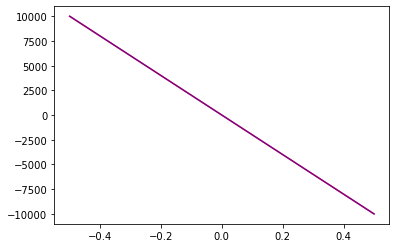

In [3]:
def analytic_compute(particles,maximum,minimum,N,A): #Checking the analytic code above
    
    force_val = []
    for p in particles:
        force_val.append(((A*N)/(maximum-minimum))*(maximum + minimum - 2*p)) #Coding in the formula above
        
    return force_val

analytic_force = analytic_compute(particles,right,left,N,A) #Computing the total force

plt.plot(particles,total_force,color='red')
plt.plot(particles,analytic_force,color='blue',alpha=0.5) #Plotting both curves
plt.xlabel("x")
plt.ylabel("Force")
plt.show()
#Because the curve is purple (red and blue superposed), it shows the analytic solution is an accurate solution

### Part c
Now write the second part of the $N$-body code by writing a
leapfrog integrator that integrates all $N$ particles forward for a
time step $\delta t$ using the force function that you wrote in
(b). Use this $N$-body code to integrate the following system of
initial conditions
\begin{align}
  x & \in [-\pi/2,\pi/2]\\
  v &= -0.001\,\sin(x)\\
  N & = 10,001\,,
\end{align}
where the $x$ are evenly spaced in the interval given. These initial
conditions are similar to those of a dark matter halo that has just
started collapsing after decoupling from the Hubble
expansion. Integrate this system forward for a total time of $t = 200$
with $\delta t = 0.0005$. Plot the phase-space distribution $(x,v)$ at
times $t=0, 18, 25, 40, 132$, and $200$. Describe what you see
happening.

In [42]:
maxi = math.pi/2 #max and min
mini = -math.pi/2

dt = 0.0005
N = 10001
finalt = 200 
xvalues = np.linspace(mini,maxi,N) #Initial parameters and points

vvalues = -0.001*np.sin(xvalues) #Initial velocities

def forcing(xval): #Force Calculation
    F = np.zeros(len(xval)) 
    
    xidx = np.argsort(np.argsort(xval)) #Helps in computing nminus by telling how many particles are "behind" a specific particle

    nminus = xidx #Same as above
    nplus = np.abs(xidx-len(xval)+1) #Subtracting the length and adding 1 to get the opposite of nminus
    
    F = nplus - nminus #Force calculation
    
    return F

x_new = xvalues.copy() 
v_new = vvalues.copy()

timecounter = 0 #Time counter to take snapshots

x0 = x_new.copy() #Snapshot at t = 0
v0 = v_new.copy()

oldforce = forcing(x_new) #Initial forces

for times in range(int(finalt/dt)+1): #Leapfrog method
    
    x_new = x_new + dt*v_new + 0.5*(dt**2)*oldforce #Computing positions
    
    newforce = forcing(x_new) #New force from new position
    
    v_new = v_new + 0.5*dt*(newforce + oldforce) #New velocities
    
    oldforce = newforce.copy() #Copy of new force to be used as the old force
    
    #Time counters to save snapshots in different arrays
    if (timecounter > 18 and timecounter - 18 < 1e-3):
        print("t = 18 reached")
        x18 = x_new.copy()
        v18 = v_new.copy()
        
    elif (timecounter > 25 and timecounter - 25 < 1e-3):
        print("t = 25 reached")
        x25 = x_new.copy()
        v25 = v_new.copy()
        
    elif (timecounter > 40 and timecounter - 40 < 1e-3):
        print("t = 40 reached")
        x40 = x_new.copy()
        v40 = v_new.copy()
        
    elif (timecounter > 132 and timecounter - 132 < 1e-3):
        print("t = 132 reached")
        x132 = x_new.copy()
        v132 = v_new.copy()
        
    times += 1
    timecounter += dt

t = 18 reached
t = 18 reached
t = 25 reached
t = 25 reached
t = 40 reached
t = 40 reached
t = 132 reached
t = 132 reached


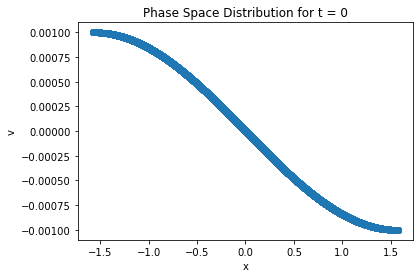

In [51]:
plt.scatter(x0,v0)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Phase Space Distribution for t = 0")
plt.show()

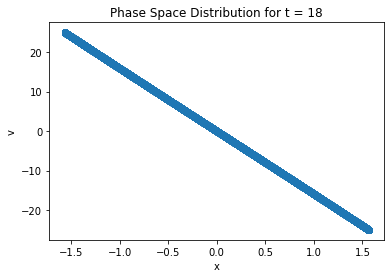

In [52]:
plt.scatter(x18,v18)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Phase Space Distribution for t = 18")
plt.show()

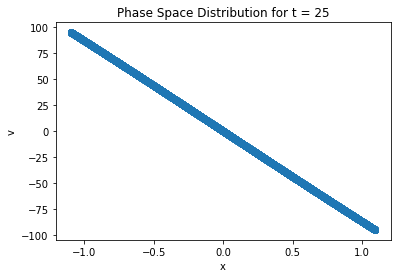

In [53]:
plt.scatter(x25,v25)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Phase Space Distribution for t = 25")
plt.show()

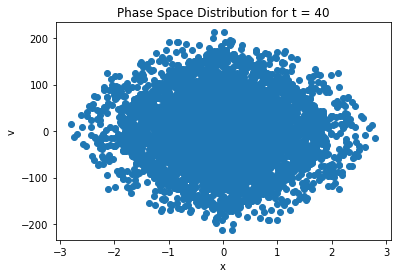

In [54]:
plt.scatter(x40,v40)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Phase Space Distribution for t = 40")
plt.show()

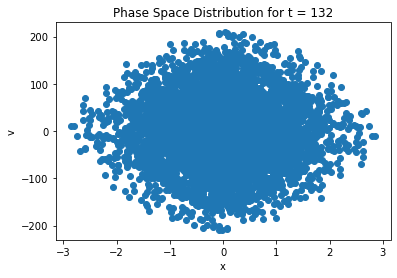

In [55]:
plt.scatter(x132,v132)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Phase Space Distribution for t = 132")
plt.show()

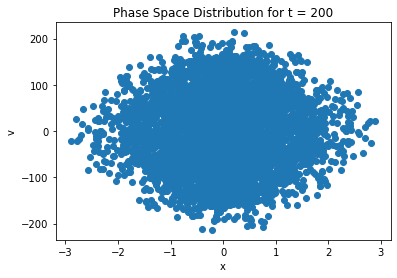

In [56]:
plt.scatter(x_new,v_new)
plt.xlabel("x")
plt.ylabel("v")
plt.title("Phase Space Distribution for t = 200")
plt.show()

As can be observed from the progression of phase space distributions over time, initially there is a relatively linear distribution, with a linear relationship between the position and velocity, but then as time progresses, the distribution smoothes out over a range of position-velocity points and exhibits phase-space mixing and relaxation!

### Part d
The simulation that you ran is the same as that shown in the GIF
at the start of chapter 6 in the notes, but the simulation in the
notes solves the $N$-body problem exactly (which is possible in 1D,
because the force does not depend on distance). Compare your
simulation's output to the GIF and discuss why your simulation might
(dis)agree with the GIF.

I think the simulation I ran agrees with the GIF because of how both systems start and how they end. As can easily be observed, since my simulation took several "snapshots" instead of taking continous measurement, I have snapshots of the phase space mixing happening. Initially, just like in the GIF, the particles are arranged with specific energies together. This aligns well with the earlier snapshot, at t = 0. Then, as time progresses, they interact with each other and even though initially we do not see an equilibrium state, just like at t = 18 and t = 25, eventually we arrive at an equilibrium state first seen in the snapshot at t = 40, which aligns with the GIF at later times, and continues up till t = 200 according to my simulations, and accordingly in the GIF as well!

## Question 2 - Recycling in chemical evolution and the abundance of deuterium.
In the class notes, we ignored the effect of recycling of unprocessed
material by stars back into the ISM. That is, we assumed that gas
consumed by star formation was fully lost from the ISM, except for the
enriched ejecta that we described using the yield parameter
$p$. However, in reality, winds from massive stars return a
significant amount of mass to the ISM that was not changed by the star
and thus returns mass to the ISM at the star's birth abundance $Z$.

Recycling is especially important to consider if we want to
investigate the abundance of deuterium in the ISM. Deuterium is an
interesting element because it is only destroyed by stars
without being created (to a good approximation, deuterium is only
produced during Big Bang nucleosynthesis [BBN]). As such, deuterium is
a good tracer of whether or not gas has ever been in a star. For
example, if most of the gas in the present-day Milky Way ISM was
previously processed in stars, then the deuterium abundance in the ISM
should be very small, because all of the deuterium should have been
destroyed. The deuterium abundance of the ISM can be determined using
UV spectroscopy and it is found to be approximately $90\%$ of the
primordial BBN abundance. Let's see what we can learn about chemical
evolution from this basic observation!

In this problem, we will denote the mass of the ISM in deuterium as
$M_D$ and the fraction of the ISM in deuterium as $X_D = M_D/M_g$. The
primordial deuterium abundance is $X_D^P$ (you don't need to know the
actual value, but it is $\approx 2.6\times 10^{-5}$). The observations
of deuterium of the ISM show that today $X_D/X_D^P \approx 0.9$. All
of the following questions can be solved analytically using the same
techniques as used in the notes for the closed/leaky/accreting box
models.

### Part a
Extend the closed box model to include the effect of recycling,
which we will model as happening instantaneously. Assume that a
fraction $r$ of the mass turned into stars is returned to ISM at the
ISM's abundance at the time of the formation of the
star. Specifically, derive the relation between $Z$, $p$, and the gas
fraction as in Equation (13.7) in the presence of
recycling. Discuss.

If we consider just a closed box model, we have, for a given gas mass, $M_g$ and gas mass in metals, $M_z$, the metallicity, $Z$, defined as:

$$ Z = \frac{M_z}{M_g}$$

And for a closed box model, we have that the difference in gass mass is mass that's been turned into stars:

$$ dM_g = -dM_*$$

However, if we are to allow recycling of unprocessed material, we can define a recycling parameter, $r$, and rewrite the equation above as:

$$dM_g = -dM_* + rdM_*$$

This can further be rewritten as:

$$dM_g = -(1-r)dM_*$$

Or, rearranging:

$$dM_* = \frac{-dM_g}{(1-r)}$$

A similar change can be made to the equation describing the change in metallicity. This is the normal equation in a closed box model, from the notes:

$$dM_z = (p - Z)dM_*$$

where $p$ is the yield parameter for metals. This can then be rewritten as:

$$dM_z = (p - Z)dM_* + ZrdM_*$$

We can plug in our equation from above for $dM_*$ to get:

$$dM_z = \left(\frac{-(p-Z+rZ)}{(1-r)}\right)dM_g$$

Also from the equation for $Z$, we can get:

$$dZ = d\left(\frac{M_z}{M_g}\right) = \frac{dM_z}{M_g} + M_z d\left(\frac{1}{M_g}\right)$$

If we plug what we have for $dM_z$ from the second last equation into the one above, we get:

$$dZ = \frac{-(p-Z+rZ)dM_g}{(1-r)M_g} + M_z \frac{dM_g}{M_g^{2}}$$

Knowing that $Z = M_z / M_g$ and rearranging the terms above, we get:

$$dZ = \frac{-p}{(1-r)}\frac{dM_g}{M_g} + \frac{-Z(1-r)}{(1-r)}\frac{dM_g}{M_g} + Z\frac{dM_g}{M_g}$$

The last two terms here cancel, and we are left with

$$dZ = \frac{-p}{(1-r)}\frac{dM_g}{M_g}$$

We can then integrate this to finally get:

$$ Z(t) = \frac{-p}{(1-r)} \ln \left(\frac{M_g(t)}{M_g(0)}\right) $$

I think the result we get is fairly interesting in how it adds a $1/(1-r)$ factor to equation 13.7 from the notes, and how that eventually affects overall metallicity. Since our $r$ values would range from 0 to 1, we can look at the behaviour between 0 and 1 and also at the extrema. For non-extreme values of r, we see that even though metallicity is increasing (which it does normally without recycling), it increases now at a faster rate since, instead of being stuck in stars, gas is now recycled and can then be used again to make stars, helping increase metallicity over time.

We can also look at the two extrema, where $r = 0$ and $r = 1$. For $r = 0$, where there is no recycling, we get back equation 13.7, where there is no effect on the metallicity due to recycling and it is defined by the yield parameter only. Looking at the other extrema, at $r = 1$, where all the gas is being recycled, $Z(t)$ blows up to infinity. This is equivalent to the stars recycling all the gas, which would mean the stars form and recycle all of their mass instantly, which doesn't seem like a physical solution, since that would mean there are essentially no stars.

### Part b
Now work out the closed box model with recycling for
deuterium. Remember that no deuterium is created by stars. What is the
relation between $X_D/X_D^P$, $r$, and the gas fraction? For the
current ISM's values of the deuterium abundance and the gas fraction,
what recycling fraction do you need to match the two?


From the question, we have that for a given mass of the ISM in deuterium, $M_D$, the fraction of the ISM in deuterium is given by:

$$X_D = M_D / M_g$$

And that with the primordial deuterium abundance, given by $X_D^P$, we have that the observations of deuterium of the ISM today show that:

$$X_D / X_D^P \approx 0.9$$

Since deuterium is only destroyed, we can write the rate of change in $M_D$ as:

$$dM_D = -X_D dM_*$$

And from before, we have that $dM_* = -dM_g/(1-r)$, which we can plugin to get:

$$dM_D = \frac{X_D M_g}{(1-r)}$$ 

From the question, we had the relationship $X_D = M_D / M_g$, which if we derivate, we get:

$$dX_D = d(M_D / M_g)$$

Rearranging and expanding for the terms, and inputting the values we have above, we get that:

$$dX_D = \frac{X_D}{(1-r)}\frac{dM_g}{M_g} - X_D\frac{dM_g}{M_g}$$

This can then be simplified to:

$$dX_D = \frac{rX_D}{(1-r)}\frac{dM_g}{M_g}$$

Rearranging then, we get:

$$\frac{dX_D}{X_D} = \frac{r}{(1-r)}\frac{dM_g}{M_g}$$

Which we can then integrate and get:

$$\ln\left(\frac{X_D(t)}{X_D(0)}\right) = \frac{r}{(1-r)}\ln\left(\frac{M_g(t)}{M_g(0)}\right)$$

Here we can remove the $\ln$ and substitute $X_D^P$ for $X_D(0)$ and we get:

$$\frac{X_D(t)}{X_D^P} = \left(\frac{M_g(t)}{M_g(0)}\right)^\frac{r}{(1-r)}$$

The values we have for $\frac{X_D(t)}{X_D^P} \approx 0.9$ and for $\frac{M_g(t)}{M_g(0)} \approx 0.1$, and we can plug that in to get:

$$r\left(1 + \frac{\ln0.9}{\ln0.1}\right) = \frac{\ln0.9}{\ln0.1}$$

Or:

$$r = \frac{\ln0.9}{\ln0.1}\left(\frac{1}{1 + \frac{\ln0.9}{\ln0.1}}\right)$$

And we finally get:

$$r \approx 0.0438$$

### Part c
Stellar evolution tells us that $r \approx 0.4$. Compare this to
the value you found in (b). If they are significantly different,
explain the physical reason for this in the context of the closed box
model.

The value I got for r, $r \approx 0.0438$ was nearly $90%$ off from the value that stellar evolution tells us. This shows that there is more recycling happening than we can measure numerically with a closed box model. This makes sense because if we were to estimate using an accreting leaky box model, we would be able to account for galactic in and outflows, which would lead to higher recycling, and thus a higher $r$ value.

### Part d
In class, we discussed how the accreting box model is successful
at explaining the absence of a large number of very metal poor stars
in the solar neighborhood (the G dwarf problem). Work out the
evolution of the deuterium abundance $X_D/X_D^P$ in the accreting box
model (with $\eta=0$), remembering that the specific model we looked
at has a constant gas mass and that any inflowing gas has the
primordial deuterium abundance. What recycling fraction $r$ do you
need now to match $X_D/X_D^P$ given the observed gas fraction?

### Part e
Write the relation that you found in (d) in terms of the
metallicity $Z$ of the ISM rather than the total-to-gas ratio
$M/M_g$. Note that for this you will need to adjust the notes'
accreting box model to take into account recycling (again use the
$\eta=0$ version to keep things simpler). Try to obtain a \emph{very}
simple relation using the fact that $Z_\odot/p \ll 1$. Fun fact: the
relation that you derive actually holds very generally, so there is a
direct relation between the metallicity of the ISM and the ratio
$X_D/X_D^P$, regardless of the details of inflow and outflow and the
star formation history.